In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

**EXERCISE 1**. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [20]:
mean_sample = 12.20
std_population = 2.50
n = 40
h0 = 13.20
alfa = 0.01
sem_population = std_population/np.sqrt(n)
z_star = (mean_sample - h0)/ sem_population
p_value = stats.norm.cdf(-abs(z_star))
z_star, p_value

(-2.5298221281347035, 0.005706018193000826)

**Solution:** Formally, based on our sample and our p-value, we reject the null hypothesis. We conclude that the mean difference of wages for this industry less than general wages. So this company can be accused of paying substandard wages according to our hypothesis test.

**EXERCISE 2**.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [21]:
df = pd.read_csv("soil - Sheet1.csv")
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [23]:
stats.shapiro(df.Soil1.dropna()), stats.shapiro(df.Soil2.dropna())
#We can easily said that two of them are normally distributed

(ShapiroResult(statistic=0.9605797529220581, pvalue=0.32050010561943054),
 ShapiroResult(statistic=0.9684141278266907, pvalue=0.40118902921676636))

In [24]:
stats.levene(df.Soil1.dropna(), df.Soil2.dropna())
#We can easily said that two of variances are equal

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [25]:
mean_soil1 = df.Soil1.mean()
mean_soil2 = df.Soil2.mean()
n_soil1 = len(df.Soil1.dropna())
n_soil2 = len(df.Soil2.dropna())
stats.ttest_ind_from_stats(mean_soil1,df.Soil1.std(),n_soil1,mean_soil2,df.Soil2.std(),n_soil2)

Ttest_indResult(statistic=5.168147331934331, pvalue=2.5932287323528494e-06)

In [26]:
stats.ttest_ind(df.Soil1.dropna(), df.Soil2.dropna())

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [27]:
sm.stats.ttest_ind(df.Soil1.dropna(), df.Soil2.dropna())

(5.16814733193433, 2.593228732352869e-06, 63.0)

**Solution**: Formally, based on our sample and our p-value, we reject the null hypothesis. We conclude that the mean difference of  shear strength for these soils are different from each other. 

**EXERCISE 3**. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [28]:
df = pd.read_csv("2015 PISA Test - Sheet1.csv")
df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [30]:
df[df.Continent_Code.isnull()]

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
8,CAN,NaN,88.470000,515.6474,526.6678,527.7047
13,CRI,NaN,59.762950,400.2534,427.4875,419.6080
18,DOM,NaN,54.215766,327.7020,357.7377,331.6388
45,MEX,NaN,57.431043,408.0235,423.2765,415.7099
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [31]:
df.loc[df[df.Continent_Code.isnull()].index,"Continent_Code"] = "NA"

In [32]:
df.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', 'NA', 'AF'], dtype=object)

In [33]:
df.groupby("Continent_Code")["Math"].describe().T

Continent_Code,AF,AS,EU,NA,OC,SA
count,2.000000,17.000000,37.000000,5.000000,2.000000,7.000000
mean,363.212100,466.216647,477.981449,424.250960,494.559750,402.887700
std,5.099513,64.356490,35.150403,71.717058,0.938401,18.128894
min,359.606200,380.259000,371.311400,327.702000,493.896200,377.069500
25%,361.409150,403.833200,464.040100,400.253400,494.227975,388.102200
50%,363.212100,459.816000,489.728700,408.023500,494.559750,409.033300
75%,365.015050,531.296100,503.722000,469.628500,494.891525,417.617650
max,366.818000,564.189700,521.250600,515.647400,495.223300,422.671400


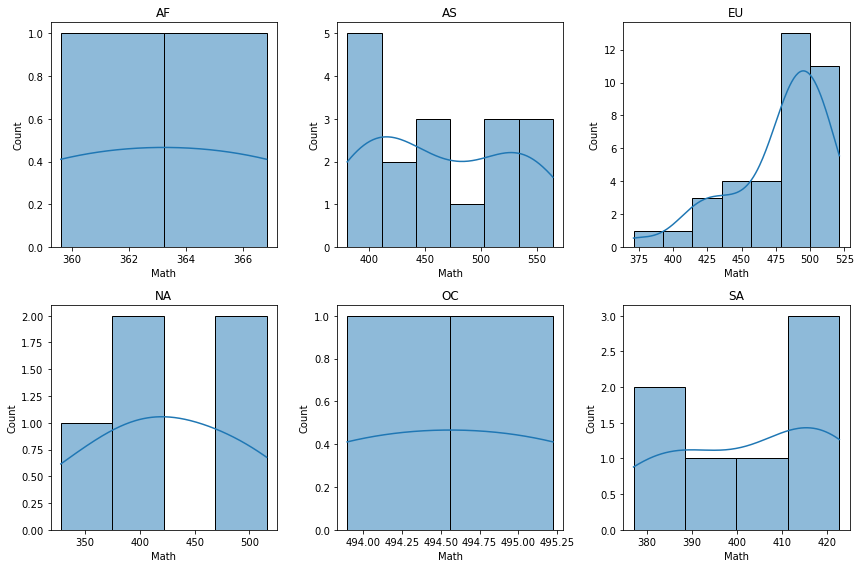

In [34]:
fig, ax = plt.subplots(2,3, figsize=(12,8))
sns.histplot(df[df.Continent_Code == "AF"]["Math"], kde=True, ax=ax[0,0]).set(title="AF")
sns.histplot(df[df.Continent_Code == "AS"]["Math"], kde=True, ax=ax[0,1]).set(title="AS")
sns.histplot(df[df.Continent_Code == "EU"]["Math"], kde=True, ax=ax[0,2]).set(title="EU")
sns.histplot(df[df.Continent_Code == "NA"]["Math"], kde=True, ax=ax[1,0]).set(title="NA")
sns.histplot(df[df.Continent_Code == "OC"]["Math"], kde=True, ax=ax[1,1]).set(title="OC")
sns.histplot(df[df.Continent_Code == "SA"]["Math"], kde=True, ax=ax[1,2]).set(title="SA")
plt.tight_layout();

<AxesSubplot:ylabel='Math'>

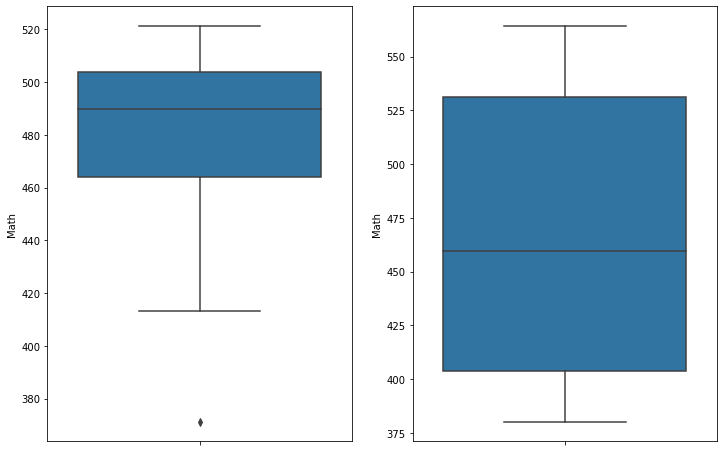

In [35]:
fig, ax = plt.subplots(1,2, figsize=(12,8))
sns.boxplot(y = df[df.Continent_Code == "EU"]["Math"], ax=ax[0])
sns.boxplot(y = df[df.Continent_Code == "AS"]["Math"], ax=ax[1])

In [36]:
stats.ttest_ind(df[df.Continent_Code == "EU"]["Math"], df[df.Continent_Code == "AS"]["Math"])

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

**Solution:** Formally, based on our sample and our p-value, we fail to reject the null hypothesis. We conclude that there is no difference between EU and AS mean of Math Scores .

**EXERCISE 4**.  A gym operator organized a 2-month exercise and diet program for 15 customers suffering from their excess weight. To evaluate whether this diet program was effective, he measured the customers' starting and ending weights and recorded them in the computer. Did the exercise and diet program have an impact on customers' weight loss? Use an α = .01 level test.  Weight Dataset

CHECK: statistic=2.67808348404993, pvalue=0.00900646517506627

In [37]:
df = pd.read_csv("weight - Sheet1.csv")
df

,ID,starting,ending
0,1,76,72
1,2,81,82
2,3,86,84
3,4,71,71
4,5,88,83
5,6,78,74
6,7,76,70
7,8,81,80
8,9,79,78
9,10,77,79


In [38]:
stats.ttest_rel(df.ending, df.starting, alternative="less" )

Ttest_relResult(statistic=-2.6780834840499255, pvalue=0.00900646517506626)

**Solution:** Formally, based on our sample and our p-value, we reject the null hypothesis. We can say that there is a significant difference between ending and starting weights.